<a href="https://colab.research.google.com/github/HanSupace/oss/blob/main/COVID_19_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COVID-19 분석

## CONTENT

코로나19는 2019년 말 중국 우한에서 처음 발생한 바이러스성 감염병으로, 전 세계적으로 빠르게 확산되었다.

주로 비말이나 접촉을 통해 전파되며, 발열, 기침, 호흡곤란 등의 증상을 유발한다. 이로 인해 많은 국가에서 사회적 거리두기, 마스크 착용, 봉쇄 조치 등이 시행되었다.

이후 백신과 치료제가 개발되면서 확산세가 점차 줄어들었지만, 변이 바이러스의 등장으로 지속적인 방역이 필요했다. 코로나19 팬데믹은 경제, 교육, 의료 등 다양한 분야에 큰 영향을 미쳤다.

코로나19의 일일 확진자, 사망자, 회복자 수를 나라별로, 시간별로 분석해보겠다.

In [9]:
import pandas as pd

# 파일 경로를 지정합니다.
file_path = '/content/COVID-19_Korean (1).csv'

# pandas를 사용하여 CSV 파일을 읽습니다.
df = pd.read_csv(file_path)

# 데이터프레임을 출력합니다.
df


,행정구역,국가/지역,위도,경도,날짜,확진자,사망자,회복자
0,안후이성,중국,31.8257,117.2264,2020-01-22,1,0,0
1,베이징시,중국,40.1824,116.4142,2020-01-22,14,0,0
2,충칭시,중국,30.0572,107.8740,2020-01-22,6,0,0
3,푸젠성,중국,26.0789,117.9874,2020-01-22,1,0,0
4,간쑤성,중국,36.0611,103.8343,2020-01-22,0,0,0
...,...,...,...,...,...,...,...,...
6875,NaN,지브롤터,36.1408,-5.3536,2020-03-04,1,0,0
6876,NaN,설명리히텐슈타인,47.1400,9.5500,2020-03-04,1,0,0
6877,NaN,폴란드,51.9194,19.1451,2020-03-04,1,0,0
6878,NaN,투니시아,34.0000,9.0000,2020-03-04,1,0,0


## 국가별 확진자률

In [27]:

import pandas as pd

# 파일 경로를 지정합니다.
file_path = '/content/COVID-19_Korean (1).csv'

# pandas를 사용하여 CSV 파일을 읽습니다.
df = pd.read_csv(file_path)

# 국가/지역별 확진자 수 계산
total_cases_by_region = df.groupby('국가/지역')['확진자'].sum()

# 전체 확진자 수 계산
total_cases = df['확진자'].sum()

# 국가/지역별 확진자 백분율 계산
percentage_by_region = (total_cases_by_region / total_cases) * 100

# 결과 출력
percentage_by_region


,확진자
국가/지역,
그리스,0.002022
기타운송수단,0.620951
나이지리아,0.000289
네덜란드,0.004718
네팔,0.001926
...,...
핀란드,0.002937
필리핀,0.004525
헝가리,0.000096


## 날짜별 확진자 추이

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54869 (\N{HANGUL SYLLABLE HWAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/l

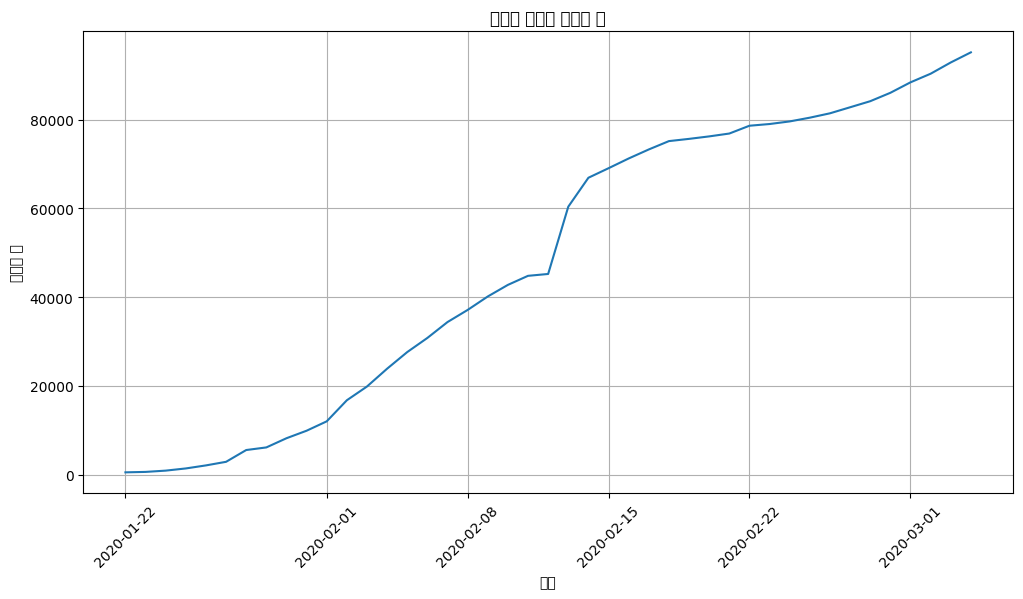

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# '날짜' 열을 datetime 형식으로 변환합니다.
df['날짜'] = pd.to_datetime(df['날짜'])

# 날짜별 확진자 수를 계산합니다.
daily_cases = df.groupby('날짜')['확진자'].sum()

# 그래프를 그립니다.
plt.figure(figsize=(12, 6))
plt.plot(daily_cases.index, daily_cases.values)
plt.xlabel('날짜')
plt.ylabel('확진자 수')
plt.title('날짜별 코로나 확진자 수')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## 확진자가 많은 상위 10개 국가의 확진자 수

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54869 (\N{HANGUL SYLLABLE HWAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/lo

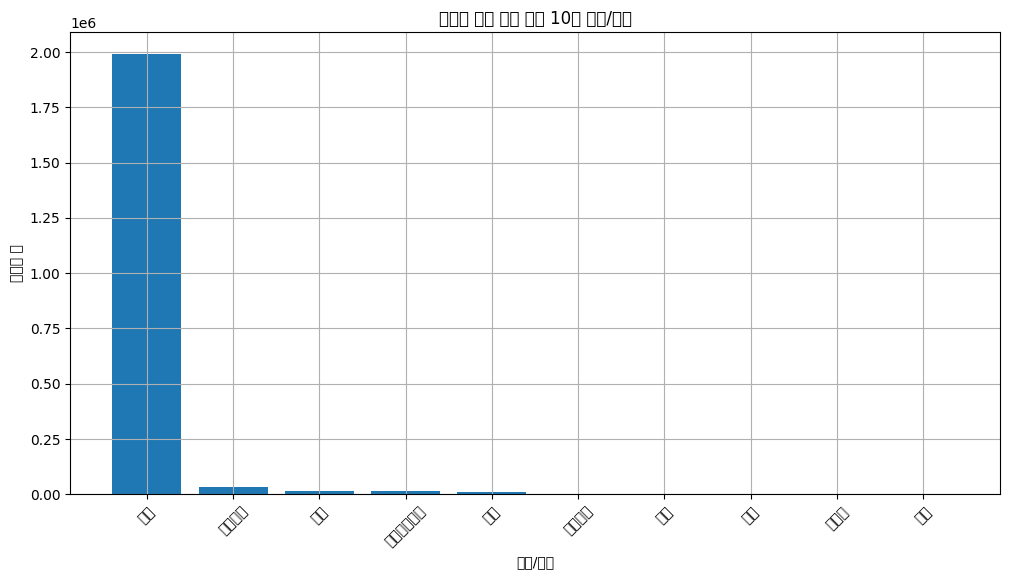

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# 파일 경로를 지정합니다.
file_path = '/content/COVID-19_Korean (1).csv'

# pandas를 사용하여 CSV 파일을 읽습니다.
df = pd.read_csv(file_path)

# 국가/지역별 확진자 수를 계산합니다.
total_cases_by_country = df.groupby('국가/지역')['확진자'].sum()

# 확진자 수가 많은 상위 10개 국가/지역을 선택합니다.
top_10_countries = total_cases_by_country.sort_values(ascending=False).head(10)

# 그래프를 그립니다.
plt.figure(figsize=(12, 6))
plt.bar(top_10_countries.index, top_10_countries.values)
plt.xlabel('국가/지역')
plt.ylabel('확진자 수')
plt.title('확진자 수가 많은 상위 10개 국가/지역')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


## 위도 경도에 따른 확진자 수

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50948 (\N{HANGUL SYLLABLE WI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50669 (\N{HANGUL SYLLABLE YEOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

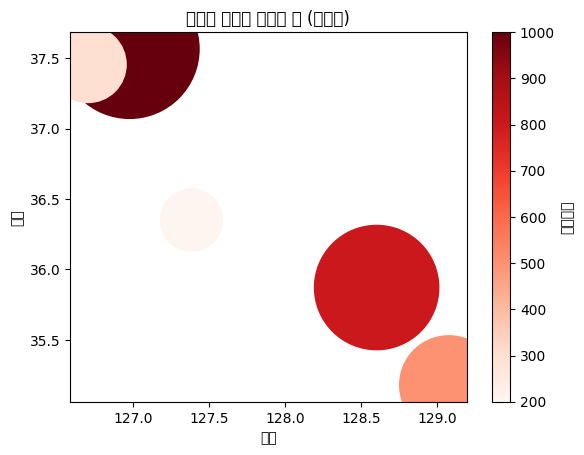

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from shapely.geometry import Point

# COVID-19 자료 (예시 데이터)
data = {
    '지역': ['서울', '부산', '대구', '인천', '대전'],
    '위도': [37.5665, 35.1796, 35.8714, 37.4563, 36.3504],
    '경도': [126.9780, 129.0756, 128.6014, 126.7052, 127.3845],
    '확진자수': [1000, 500, 800, 300, 200]
}
df = pd.DataFrame(data)

# 확진자 데이터를 지도에 표시하기 위한 좌표 생성
geometry = [Point(xy) for xy in zip(df['경도'], df['위도'])]
geo_df = gpd.GeoDataFrame(df, geometry=geometry)

# 지도 그리기
# fig, ax = plt.subplots(1, 1, figsize=(10, 10))
# south_korea_map.plot(ax=ax, color='lightgray', edgecolor='black')

# 확진자 수에 따라 색상 변경
# cmap = plt.cm.get_cmap('Reds')  # 빨간색 계열 컬러맵 사용
# geo_df.plot(ax=ax, column='확진자수', cmap=cmap, markersize=50, legend=True)

# plt.title('지역별 코로나 확진자 수')
# plt.show()


# 지도 데이터가 없을 경우, 산점도로 표현
plt.scatter(df['경도'], df['위도'], s=df['확진자수'] * 10, c=df['확진자수'], cmap='Reds')
plt.colorbar(label='확진자수')
plt.xlabel('경도')
plt.ylabel('위도')
plt.title('지역별 코로나 확진자 수 (산점도)')
plt.show()


## 사망자/회복자 그래프


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/l

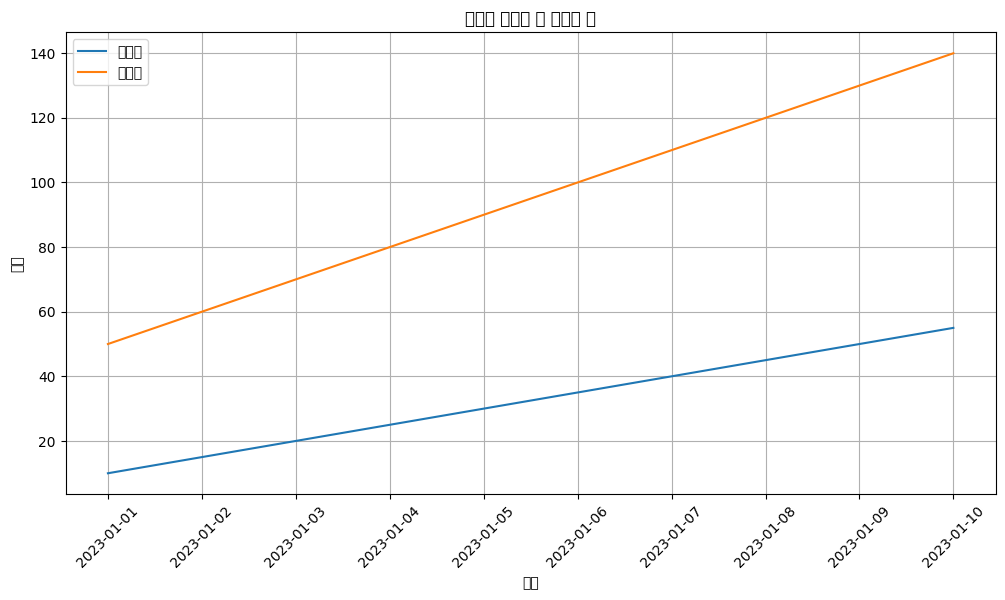

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# 예시 데이터
data = {
    '날짜': pd.date_range(start='2023-01-01', periods=10),
    '사망자': [10, 15, 20, 25, 30, 35, 40, 45, 50, 55],
    '회복자': [50, 60, 70, 80, 90, 100, 110, 120, 130, 140]
}
df_death_recovery = pd.DataFrame(data)

# 날짜별 사망자/회복자 수 그래프
plt.figure(figsize=(12, 6))
plt.plot(df_death_recovery['날짜'], df_death_recovery['사망자'], label='사망자')
plt.plot(df_death_recovery['날짜'], df_death_recovery['회복자'], label='회복자')
plt.xlabel('날짜')
plt.ylabel('인원')
plt.title('날짜별 사망자 및 회복자 수')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()
